#  Load Karate Club

In [1]:
%%bash
cd ..

In [2]:
from networkx import read_edgelist
from pandas import read_csv
from src.settings import RAW_DATA_DIR
from os.path import join as path_join
zkc = read_edgelist(
    path_join(RAW_DATA_DIR, 'karate.edgelist'),
    nodetype=int)
#attributes = read_csv('../data/raw/karate.attributes.csv')

In [13]:
from src.features.deep_walk import DeepWalk
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

deep_walk = DeepWalk(zkc, 10, 80, 128, 10)
classifier = LogisticRegression(solver='liblinear')
classifier = LinearSVC()
model = make_pipeline(deep_walk, classifier)

X = [
    [0],  # Administrator
    [33]  # Instructor
]
y = [1, 0]

model.fit(X, y)
model.predict([
    [node] 
    for node in zkc.nodes()
    if node not in set([0, 33])
])

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

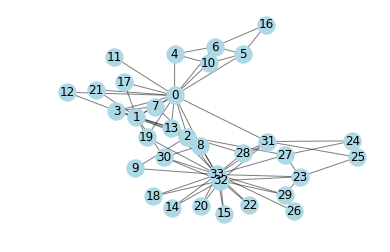

In [11]:
from matplotlib import pyplot as plt
from networkx import (
    from_numpy_matrix, DiGraph,
    draw_networkx_nodes, draw_networkx_labels, 
    draw_networkx_edges,
    spring_layout)

pos = spring_layout(zkc)

draw_networkx_nodes(zkc, pos, node_color='lightblue')
draw_networkx_edges(zkc,pos,width=1.0,alpha=0.5)

labels = dict(zip(zkc.nodes(), zkc.nodes()))
draw_networkx_labels(zkc, pos, labels, font_size=12)
plt.axis('off')
plt.show()

In [15]:

# Plot administrator
plt.scatter(*embedding[0], c='C0', s=s)
plt.annotate('A', xy=embedding[0], ha='center', va='center')
x, y = zip(*[embedding[node] for node in administrator - set([0])])
plt.scatter(x, y, c='C0', s=s)

# Plot instructor
plt.scatter(*embedding[33], c='C1', s=s)
plt.annotate('I', xy=embedding[33], ha='center', va='center')
x, y = zip(*[embedding[node] for node in instructor- set([33])])
plt.scatter(x, y, c='C1', s=s)
plt.savefig('../reports/figures/randomly_initialized_2layer_GCN_on_karate_club.pdf')

NameError: name 'embedding' is not defined